## Import Main Modules & Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import itertools

In [4]:
df1 = pd.read_csv('../dataset/train.csv', sep=';')

In [5]:
df2 = pd.read_csv('../dataset/test.csv', sep=';')

In [6]:
df3 = pd.read_csv('../dataset/evaluation.csv', sep=';')

In [7]:
df = pd.concat([df1, df2, df3], ignore_index=True)

## Perform Basic Analysis

In [8]:
df.shape

(40587, 4)

In [9]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label          int64
dtype: object

In [10]:
_ = [print(f'{df[column].value_counts()}\n') for column in df.columns]

Unnamed: 0
0        3
5407     3
5420     3
5419     3
5418     3
        ..
13533    1
13534    1
13535    1
13536    1
24352    1
Name: count, Length: 24353, dtype: int64

title
no title                                                                                                                          153
Factbox: Trump fills top jobs for his administration                                                                               14
newsticker                                                                                                                         11
Factbox: Contenders for senior jobs in Trump's administration                                                                       8
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                                           6
                                                                                                                                 ... 
Moroccan police 

In [11]:
df.nunique()

Unnamed: 0    24353
title         39997
text          40585
label             2
dtype: int64

In [12]:
df['Unnamed: 0']

0           0
1           1
2           2
3           3
4           4
         ... 
40582    8112
40583    8113
40584    8114
40585    8115
40586    8116
Name: Unnamed: 0, Length: 40587, dtype: int64

In [13]:
df.label

0        1
1        1
2        0
3        1
4        0
        ..
40582    0
40583    0
40584    0
40585    1
40586    1
Name: label, Length: 40587, dtype: int64

In [14]:
df.label.value_counts()

label
1    21924
0    18663
Name: count, dtype: int64

## Handle Missing Values

In [15]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

## Drop Irrelevant Variables

In [16]:
df = df.drop(columns=['Unnamed: 0'])

In [17]:
df.head()

title  \
0  Palestinians switch off Christmas lights in Be...   
1  China says Trump call with Taiwan president wo...   
2   FAIL! The Trump Organization’s Credit Score W...   
3  Zimbabwe military chief's China trip was norma...   
4  THE MOST UNCOURAGEOUS PRESIDENT EVER Receives ...   

                                                text  label  
0  RAMALLAH, West Bank (Reuters) - Palestinians s...      1  
1  BEIJING (Reuters) - U.S. President-elect Donal...      1  
2  While the controversy over Trump s personal ta...      0  
3  BEIJING (Reuters) - A trip to Beijing last wee...      1  
4  There has never been a more UNCOURAGEOUS perso...      0

## Perform Basic Analysis - Cleaned Dataset

In [18]:
df.shape

(40587, 3)

In [19]:
df.dtypes

title    object
text     object
label     int64
dtype: object

In [20]:
_ = [print(f'{df[column].value_counts()}\n') for column in df.columns]

title
no title                                                                                                                          153
Factbox: Trump fills top jobs for his administration                                                                               14
newsticker                                                                                                                         11
Factbox: Contenders for senior jobs in Trump's administration                                                                       8
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                                           6
                                                                                                                                 ... 
Moroccan police break up Islamic State cell planning attacks: ministry                                                              1
Mike Pence VICIOUSLY Refused To Pardon Black Man Wrongfu

In [21]:
df.nunique()

title    39997
text     40585
label        2
dtype: int64

## Count Plot for Label Distribution
* The bar chart shows the distribution of labels in the dataset, where each label represents a binary class (0 or 1). Label “0” and label “1” appear with almost equal frequency, with label “1” being slightly more prevalent. Both classes have a high count, suggesting a fairly balanced dataset, which is beneficial for training a binary classification model as it reduces the risk of class imbalance issues. This balance helps the model learn to distinguish between the two classes effectively without being biased towards one due to unequal sample sizes.

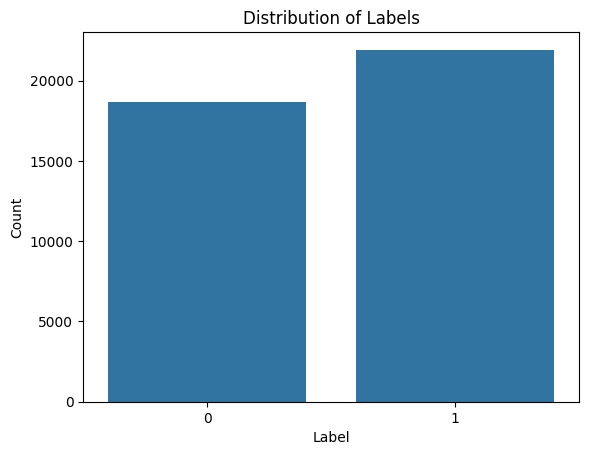

In [22]:
sns.countplot(data=df, x='label')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

## Word Frequency Plot for Titles or Text
* The bar chart displays the top 10 most frequent words in article titles, with the word “s” being the most common, followed closely by “trump” and “of.” Other frequently occurring words include “for,” “video,” “on,” “u,” “says,” “with,” and “obama.” This suggests that titles often mention political figures (e.g., “trump” and “obama”) and frequently use common prepositions or filler words. The high occurrence of “s” may indicate an artifact from data processing (e.g., possessive forms or contractions). This word frequency pattern highlights potential key themes and common terms in the dataset’s titles.

In [23]:
import re

In [24]:
from collections import Counter

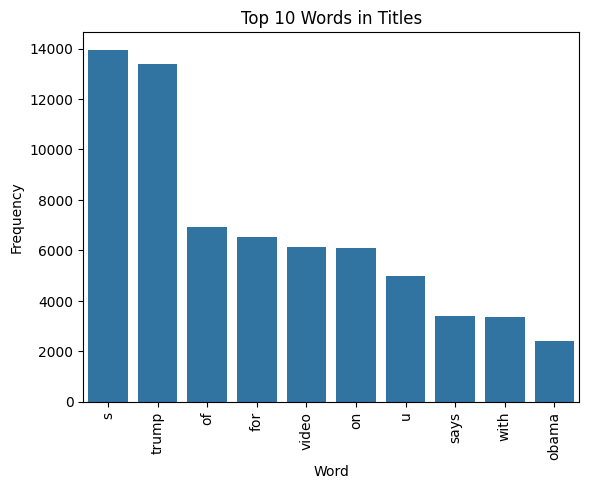

In [25]:
def preprocess_text(text):
    """
    Function to clean and tokenize text.

    Params:
        text: str

    Returns:
        list
    """
    text = re.sub(r'\W+', ' ', text)  # remove non-alphanumeric characters
    tokens = text.lower().split()     # lowercase and split into words
    stopwords = set(['the', 'a', 'and', 'is', 'to', 'in'])
    return [word for word in tokens if word not in stopwords]

# get word frequencies for titles
all_words = df['title'].dropna().apply(preprocess_text).sum()
word_counts = Counter(all_words).most_common(10)

# create a DataFrame for easy plotting
word_freq_df = pd.DataFrame(word_counts, columns=['word', 'frequency'])

# plot the top 10 most common words
sns.barplot(data=word_freq_df, x='word', y='frequency')
plt.title('Top 10 Words in Titles')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## Top N-Grams Plot
* The bar chart displays the top 10 most frequent 2-word phrases (bigrams) in the dataset. “Donald Trump” is the most common bigram by a significant margin, followed by “United States” and “White House.” Other frequently appearing bigrams include political figures and entities, such as “Hillary Clinton” and “President Donald,” as well as locations and organizations like “New York,” “Washington Reuters,” and “Twitter com.” This suggests that the dataset’s content focuses heavily on U.S. politics and prominent public figures, with a notable emphasis on news related to government institutions and media coverage.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

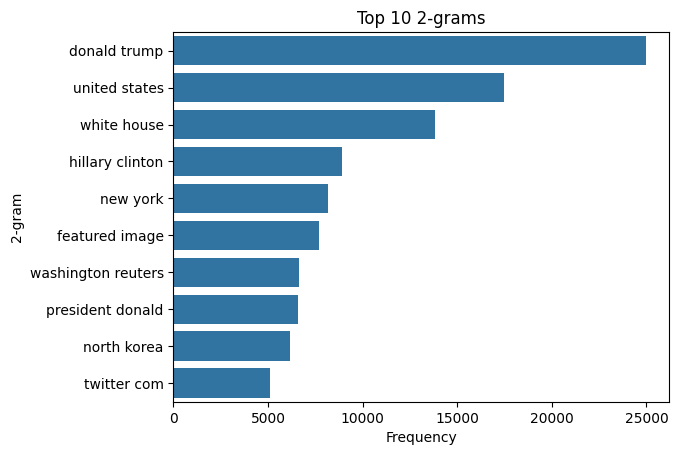

In [28]:
# function to extract and plot top n-grams

def plot_top_ngrams(text_data, n=2, top_n=10):

    """
    Function to extract and plot top n-grams.

    Params:
        text_data: str
        n: int, optional
        top_n: int, optional
    """
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english')
    ngrams = vectorizer.fit_transform(text_data.dropna())
    ngram_counts = pd.DataFrame(ngrams.sum(axis=0), columns=vectorizer.get_feature_names_out(), index=['count']).T
    top_ngrams = ngram_counts.nlargest(top_n, 'count')

    # plot top n-grams
    sns.barplot(data=top_ngrams.reset_index(), x='count', y='index')
    plt.title(f'Top {top_n} {n}-grams')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-gram')
    plt.show()

# plot top 2-grams for text column
plot_top_ngrams(df['text'], n=2, top_n=10)

## Text Length Distribution by Label
* The histogram shows the distribution of text lengths for two labels (0 and 1) in the dataset. Most articles have relatively short text lengths, with a high concentration below 10,000 characters. Label “1” articles (orange) have a slightly higher frequency at shorter lengths compared to label “0” articles (blue), but both labels follow a similar distribution pattern. The distribution is right-skewed, with a few texts extending beyond 10,000 characters. This suggests that most articles in the dataset are concise, with only a few lengthy entries, regardless of the label.

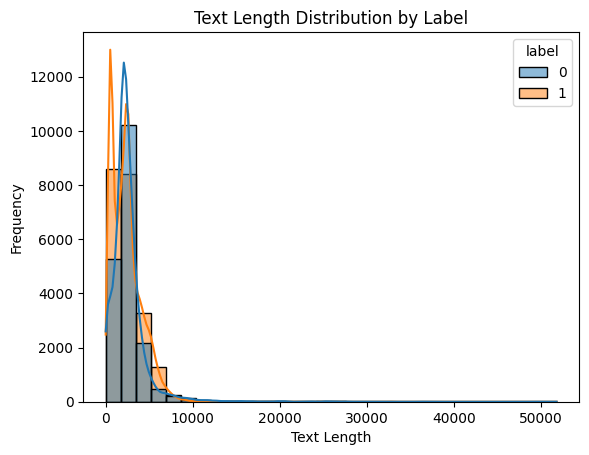

In [29]:
# calculate the length of each text entry
df['text_length'] = df['text'].apply(lambda x: len(str(x)))

# plot the distribution of text lengths by label
sns.histplot(data=df, x='text_length', hue='label', bins=30, kde=True)
plt.title('Text Length Distribution by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

## TF-IDF Feature Visualization
* The bar chart shows the average TF-IDF scores of selected words across two labels (0 and 1) in the dataset. Certain words have notably higher average scores in one label over the other, indicating their association with that label. For example, “said” and “state” have high TF-IDF scores in label “1,” while “reuters” and “trump” show higher scores in label “0.” This suggests that different words are more distinctive to each label, potentially reflecting the differing content or focus between articles labeled as “0” and “1.” These TF-IDF scores help highlight terms that may be more informative or unique to each label.

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

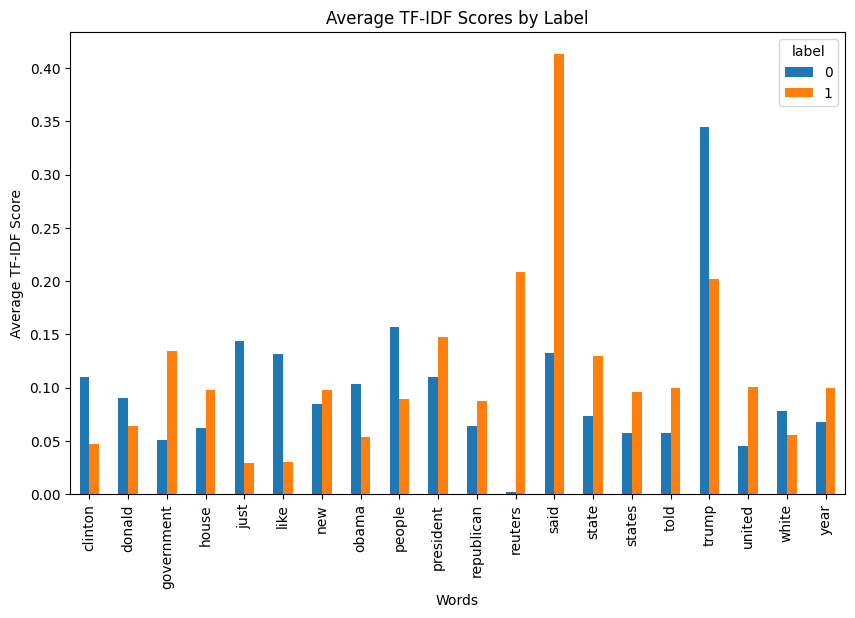

In [31]:
# vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=20)  # limit to 20 words for clarity
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# add label to the TF-IDF DataFrame
tfidf_df['label'] = df['label']

# plot average TF-IDF scores by label for the top words
tfidf_avg = tfidf_df.groupby('label').mean().T
tfidf_avg.plot(kind='bar', figsize=(10, 6))
plt.title('Average TF-IDF Scores by Label')
plt.ylabel('Average TF-IDF Score')
plt.xlabel('Words')
plt.show()

## Text Embeddings Visualization with PCA or t-SNE
* The scatter plot shows a 2D visualization of text embeddings for two labels (0 and 1) after dimensionality reduction using PCA. Each point represents an article, with blue points for label 0 and green points for label 1. While there is some overlap, we can see a general separation between the two clusters, indicating that the embeddings for each label have distinguishable patterns. This separation suggests that the model can likely differentiate between the two labels based on the embedded text features, though the overlap indicates that there may still be some similarity between certain articles in both categories.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
from sklearn.decomposition import PCA

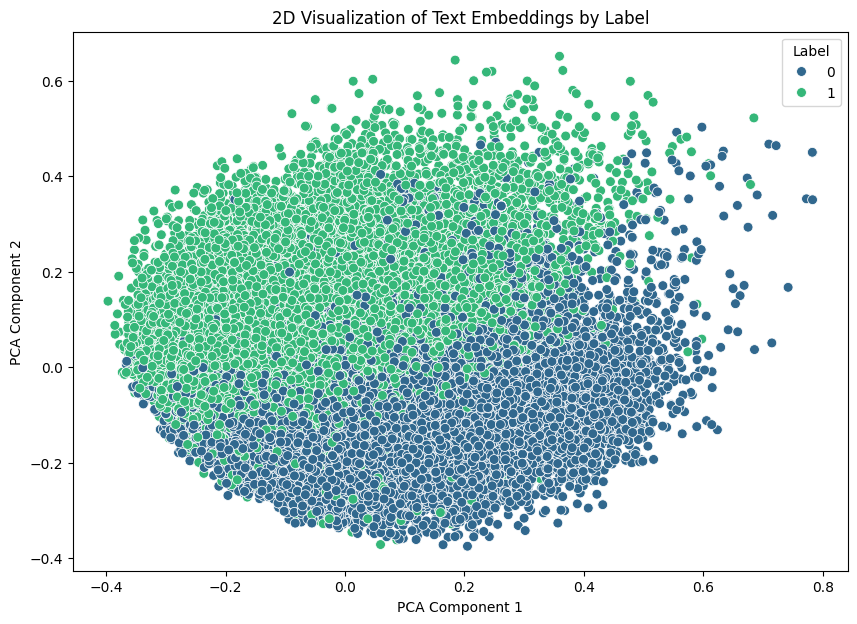

In [34]:
# use TF-IDF to create embeddings
tfidf = TfidfVectorizer(max_features=100)  # limit to 100 features for simplicity
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))

# apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# create a scatter plot with PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['label'], palette="viridis", s=50)
plt.title('2D Visualization of Text Embeddings by Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Label')
plt.show()

## Word Cloud for Titles or Text by Label
* The word clouds for labels “1” (true articles) and “0” (false articles) reveal distinct language patterns. In true articles (Label 1), frequent words like “said,” “Trump,” “U.S.,” “state,” and “United” suggest a focus on formal reporting, often involving political figures and institutions. Terms such as “White House,” “statement,” and specific days like “Tuesday” indicate that these articles commonly cover official news and statements. Conversely, false articles (Label 0) feature words like “one,” “people,” “Trump,” and “U.S.,” along with terms such as “believe,” “know,” and “make,” hinting at a more opinionated or subjective tone. The presence of words like “featured image,” “going,” and “look” implies a tendency toward sensational or clickbait language, potentially aiming to capture attention rather than provide reliable information. This contrast suggests that true articles are more aligned with structured news reporting, while false articles lean towards informal, engaging language often found in less credible content.

In [35]:
!pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from wordcloud import WordCloud

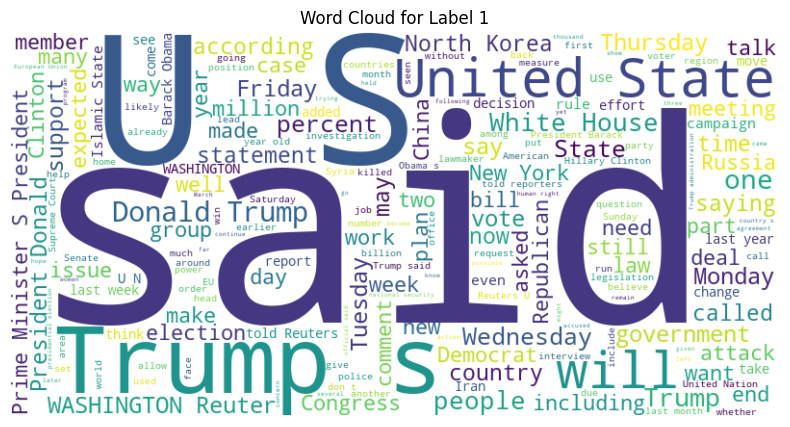

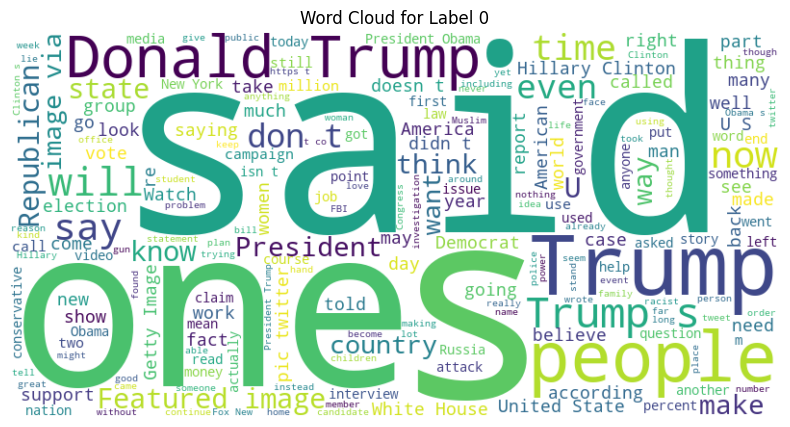

In [38]:
def plot_wordcloud(label):
    """
    Function to generate word cloud for a given label.

    Params:
        label: str
    """
    text = ' '.join(df[df['label'] == label]['text'].fillna('').tolist())
    wordcloud = WordCloud(width=800,
                          height=400,
                          background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Label {label}')
    plt.show()

# plot word clouds for each label
for label in df['label'].unique():
    plot_wordcloud(label)

## Sentiment Analysis
* The sentiment polarity distribution plot shows that both true (Label 1) and false (Label 0) articles have a strong concentration of sentiment around a neutral polarity, close to 0. The distribution of sentiment is almost symmetrical for both labels, with a slightly higher peak for true articles at the neutral point. This suggests that both true and false articles predominantly maintain a neutral tone, with only a minor skew towards positive or negative sentiment. Overall, there is minimal difference in sentiment polarity between true and false articles, indicating that sentiment alone may not be a significant distinguishing factor between these labels.

In [39]:
!pip install textblob

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 41.5/41.5 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   --------- ------------------------------ 153.6/626.3 kB 4.6 MB/s eta 0:00:01
   -------------------- ------------------- 317.4/626.3 kB 3.9 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/626.3 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------- ----------------------------- 0.4/1.5 MB 12.6 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.5 MB 9.1 MB/s eta 0:00:01
   ---------------------------- ----------- 1.1/1.5 MB 8.4 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.5 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 7.4 MB/s eta 0:00:00
   ----


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from textblob import TextBlob

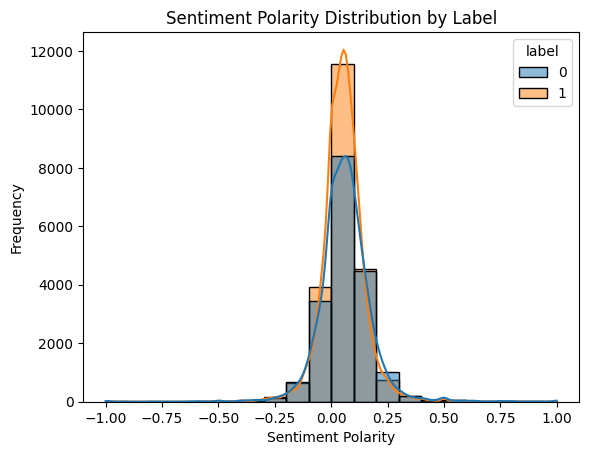

In [41]:
# calculate sentiment polarity for each text entry
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# plot sentiment distribution
sns.histplot(data=df,
             x='sentiment',
             hue='label',
             bins=20,
             kde=True)
plt.title('Sentiment Polarity Distribution by Label')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

## Heatmap of Co-Occurrence for Common Words in Titles/Text
* The heatmap shows the co-occurrence frequencies of prominent words within the text data, providing insights into which terms frequently appear together. Darker areas indicate lower co-occurrence frequencies, while lighter or more intense colors highlight higher frequencies. The words “Trump” and “said” have the highest co-occurrence with several other words, particularly with each other, indicating their centrality in the dataset. This suggests that discussions surrounding “Trump” and what was “said” are dominant themes. Other significant pairings include “government” with “state,” “president” with “Trump,” and “white” with “house,” revealing common phrases and recurring topics in the text. This visualization helps to identify key themes and relationships between frequently discussed words in the dataset.

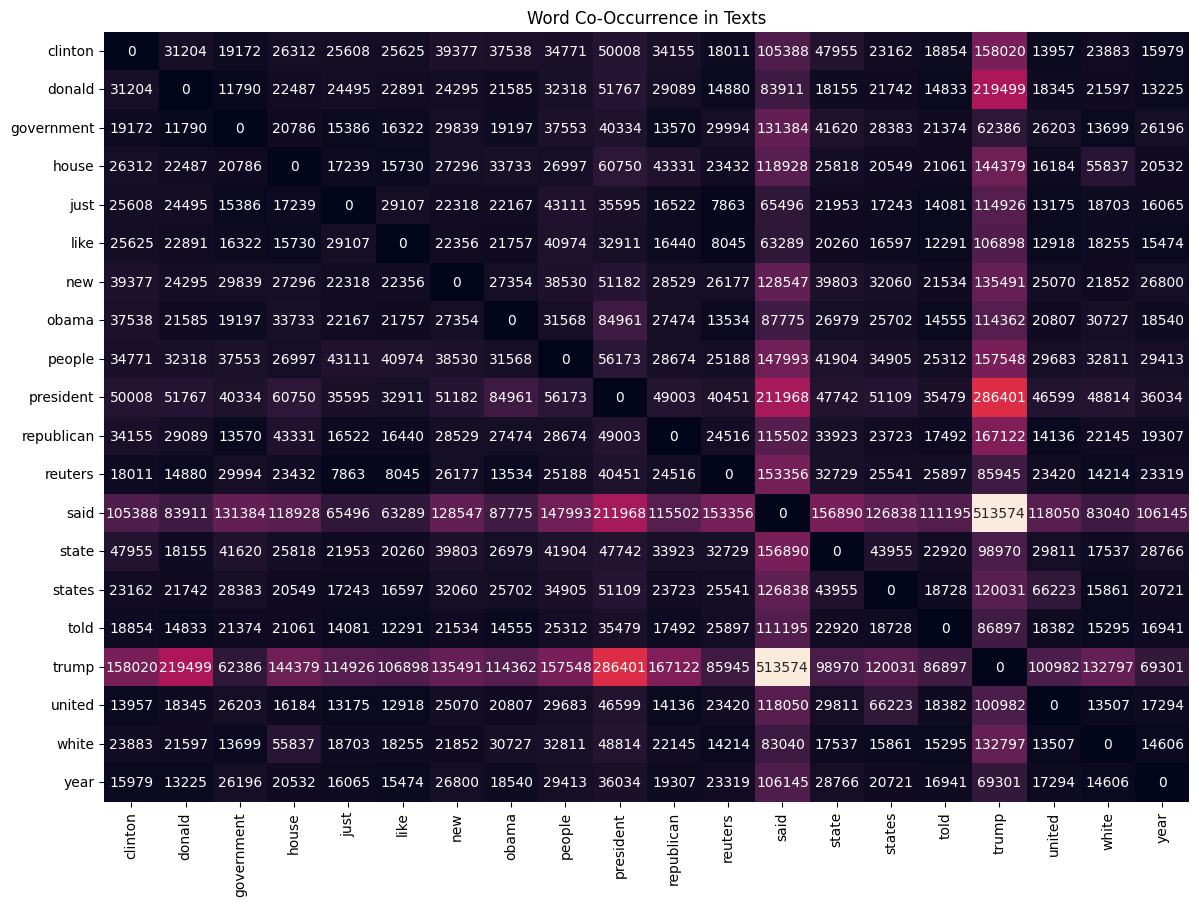

In [42]:
# initialize CountVectorizer to get word co-occurrence
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['text'].dropna())
word_cooccurrence = (X.T * X)  # multiply term-document matrix by its transpose to get co-occurrence
word_cooccurrence.setdiag(0)  # remove diagonal (self-co-occurrence)

# convert to DataFrame for heatmap
word_cooccurrence_df = pd.DataFrame(word_cooccurrence.toarray(), index=vectorizer.get_feature_names_out(), columns=vectorizer.get_feature_names_out())

# plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data=word_cooccurrence_df,
            annot=True,
            cbar=False,
            fmt='d')
plt.title('Word Co-Occurrence in Texts')
plt.show()

## Label-Based Comparison of Text Length vs. Word Count Scatter Plot
* The scatter plot shows a strong linear relationship between text length and word count, indicating that as the length of the text increases, so does the number of words in a roughly proportional manner. Each point represents an article, with blue points indicating a label of 0 and orange points indicating a label of 1. Both categories follow a similar trend along the diagonal line, showing that text length and word count are consistent metrics across both labels. There is minimal differentiation between the two labels in this relationship, suggesting that text length and word count alone might not be sufficient for distinguishing between the two classes in a binary classification task.

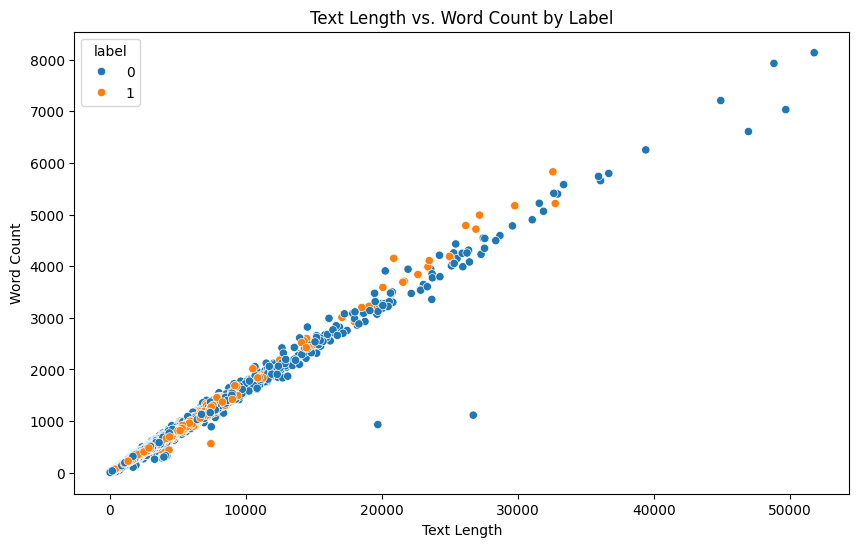

In [43]:
# calculate text length and word count
df['text_length'] = df['text'].apply(lambda x: len(str(x)))
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# scatter plot of text length vs. word count by label
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
                x='text_length',
                y='word_count',
                hue='label')
plt.title('Text Length vs. Word Count by Label')
plt.xlabel('Text Length')
plt.ylabel('Word Count')
plt.show()

## Bigrams or Trigrams by Label as a Heatmap
* This heatmap illustrates the average frequency of specific bigrams in text, categorized by label (0 or 1). The bigram “Donald Trump” stands out as particularly frequent in both labels but shows a noticeably higher frequency in label 0 (0.78) compared to label 1 (0.48). Other bigrams like “United States” and “White House” also exhibit notable differences between labels, being more frequent in label 1. This analysis reveals certain words or phrases that are emphasized differently depending on the label, suggesting potential linguistic patterns that could aid in classification tasks.

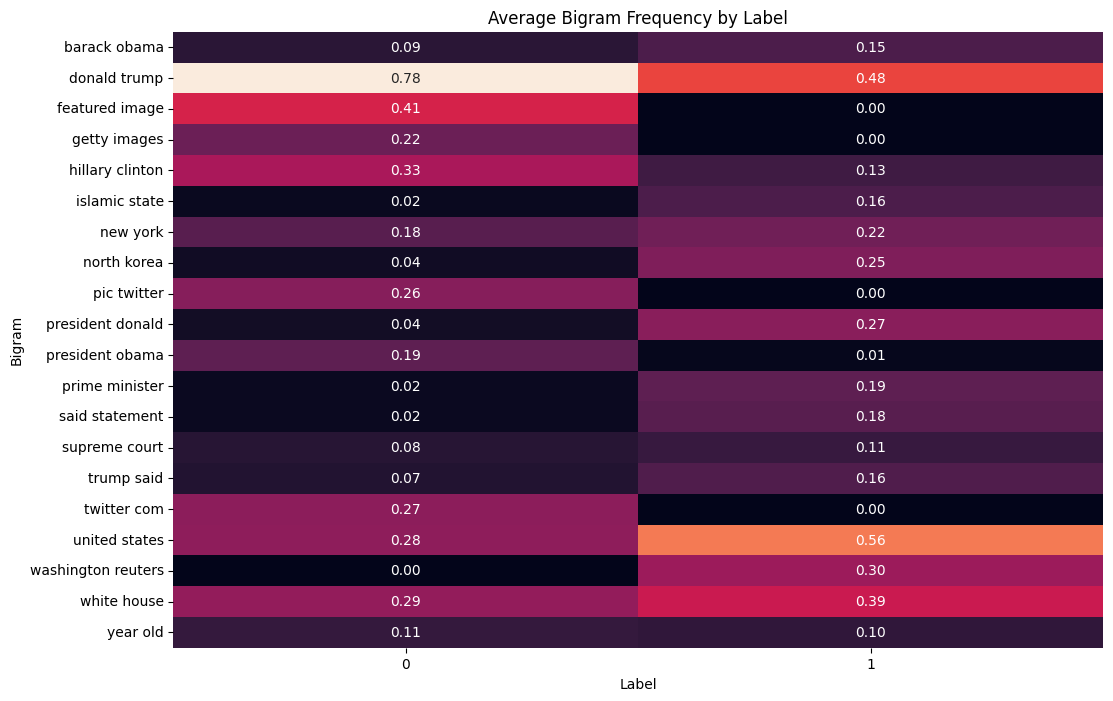

In [44]:
# extract bigrams (2-grams) for the text column
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['text'].fillna(''))

# create DataFrame of bigram counts
bigrams_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bigrams_df['label'] = df['label']

# calculate average bigram frequency for each label
bigrams_avg = bigrams_df.groupby('label').mean().T

# plot as heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data=bigrams_avg,
            annot=True,
            cbar=False,
            fmt='.2f')
plt.title('Average Bigram Frequency by Label')
plt.xlabel('Label')
plt.ylabel('Bigram')
plt.show()

## Text Complexity Analysis
* This box plot shows the log-scaled average word length for text data across two labels (0 and 1). The central tendency for average word length is similar for both labels, with most data points tightly clustered around the median value. However, label 0 exhibits more outliers with higher average word lengths compared to label 1. This indicates that texts labeled as 0 tend to have a wider range of word lengths, although the bulk of the data remains centered around a similar average for both labels.

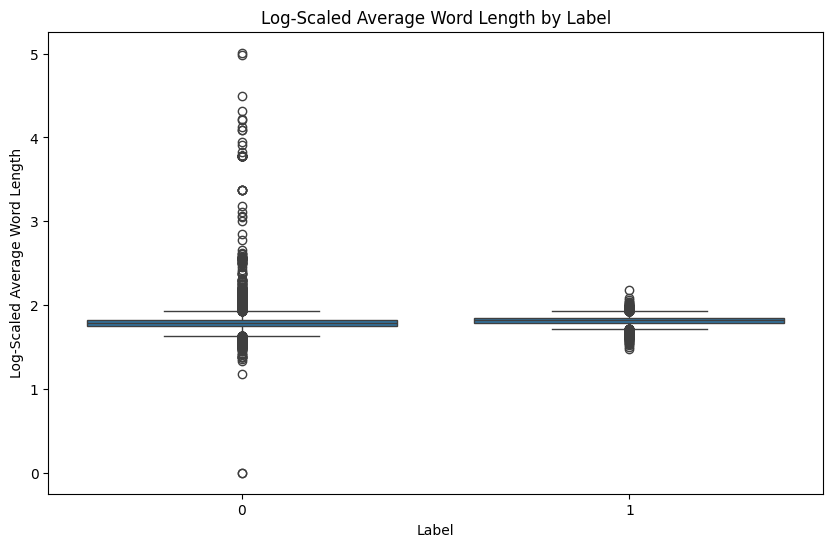

In [45]:
# calculate average word length with handling for empty or whitespace-only text entries
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]) if x and len(str(x).split()) > 0 else 0)

# apply a log transformation to the average word length to manage skewness
df['log_avg_word_length'] = np.log1p(df['avg_word_length'])  # log1p handles zero values

# plot average word length by label with log scale
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='log_avg_word_length')
plt.title('Log-Scaled Average Word Length by Label')
plt.xlabel('Label')
plt.ylabel('Log-Scaled Average Word Length')
plt.show()

## Top Unique Words by Label with Bar Plot
* The two charts display the top 10 unique words associated with each label based on their TF-IDF scores, with higher scores indicating more distinctiveness in the context of either “fake” (Label 0) or “real” (Label 1) news articles. For Label 1 (real news), the most distinctive words include “said,” “reuters,” and “president,” suggesting a focus on formal reporting language and political topics. Conversely, for Label 0 (fake news), words like “trump,” “people,” and “just” appear more frequently, indicating content that might be more conversational, opinionated, or speculative in tone. These differences in word usage reflect potential linguistic characteristics distinguishing true news reports from potentially misleading or false ones.

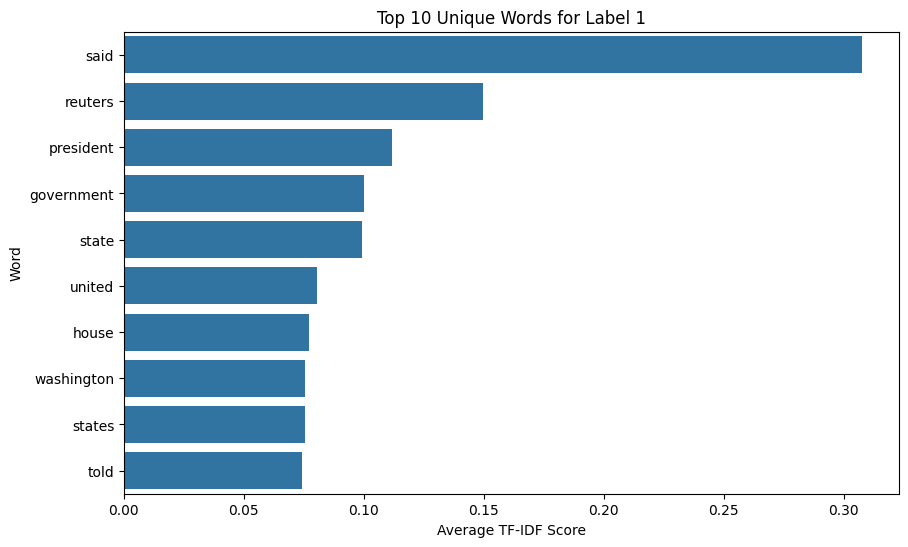

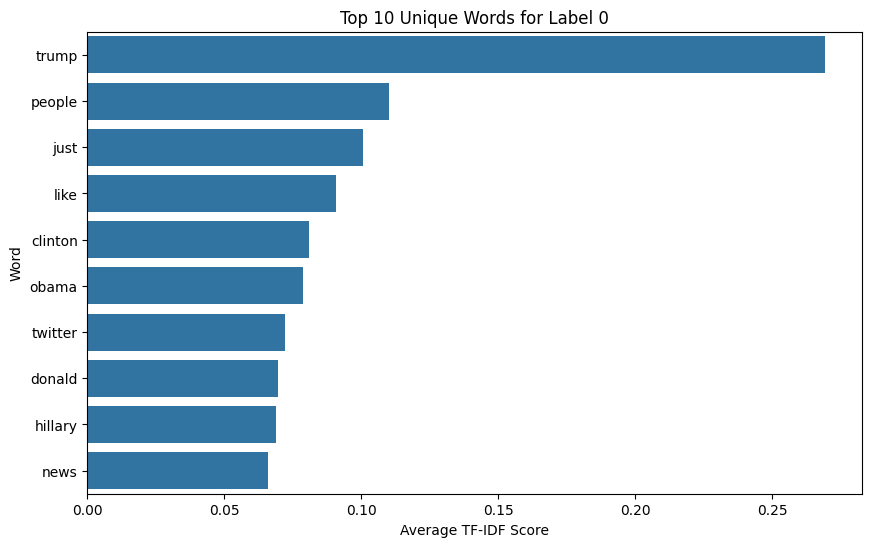

In [46]:
# create TF-IDF vectorizer and apply to the 'text' column
tfidf = TfidfVectorizer(stop_words='english', max_features=50)
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))

# get TF-IDF values in a DataFrame with labels as columns
unique_words = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
unique_words['label'] = df['label']

# calculate average TF-IDF for each label
top_words_by_label = unique_words.groupby('label').mean().T
top_words_by_label['max_label'] = top_words_by_label.idxmax(axis=1)  # label with highest tf-idf for each word

# iterate over each label and plot the top 10 words unique to that label
for label in df['label'].unique():
    # filter the top 10 words for the current label
    top_words = top_words_by_label[top_words_by_label['max_label'] == label].nlargest(10, label)
    # create bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_words[label],
                y=top_words.index,
                orient='h')
    plt.title(f'Top 10 Unique Words for Label {label}')
    plt.xlabel('Average TF-IDF Score')
    plt.ylabel('Word')
    plt.show()

## Stacked Bar Chart of Common Words by Label
* This bar chart displays the frequency of the top 10 most common words in news articles, divided by their labels (0 for fake news and 1 for real news). Words like “said” and “state” appear predominantly in real news articles (Label 1), reflecting formal reporting language. In contrast, “trump” is frequently used across both labels but shows a higher presence in real news. Words such as “people” and “president” also appear substantially in both labels, though with some variation in distribution. This visualization helps highlight the linguistic differences and shared terms between fake and real news articles.

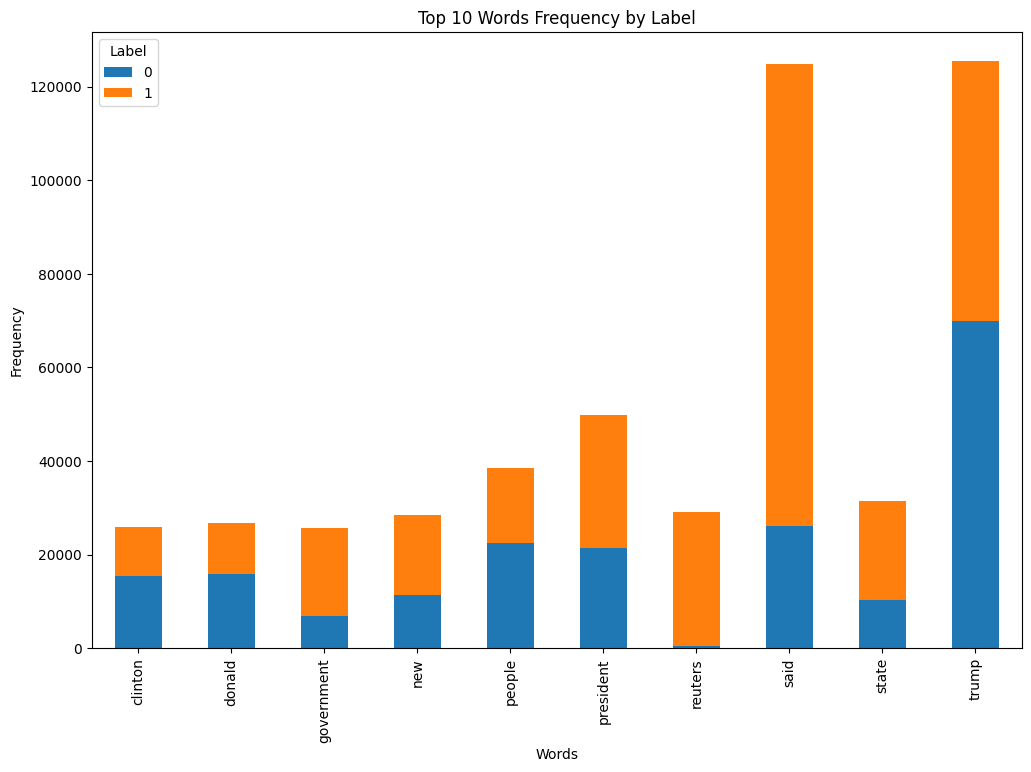

In [47]:
# extract the top words for analysis
vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(df['text'].fillna(''))
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_counts['label'] = df['label']

# calculate word frequency by label
word_freq_by_label = word_counts.groupby('label').sum().T

# plot stacked bar chart
word_freq_by_label.plot(kind='bar',
                        stacked=True,
                        figsize=(12, 8))
plt.title('Top 10 Words Frequency by Label')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.legend(title='Label')
plt.show()

## Label Proportion Pie Chart
* This pie chart illustrates the distribution of labels in the dataset, where label 1 (real news) accounts for 54% of the data, while label 0 (fake news) comprises the remaining 46%. This distribution indicates a fairly balanced dataset, with a slight majority of real news articles, which can help in developing a classifier that performs well across both classes.

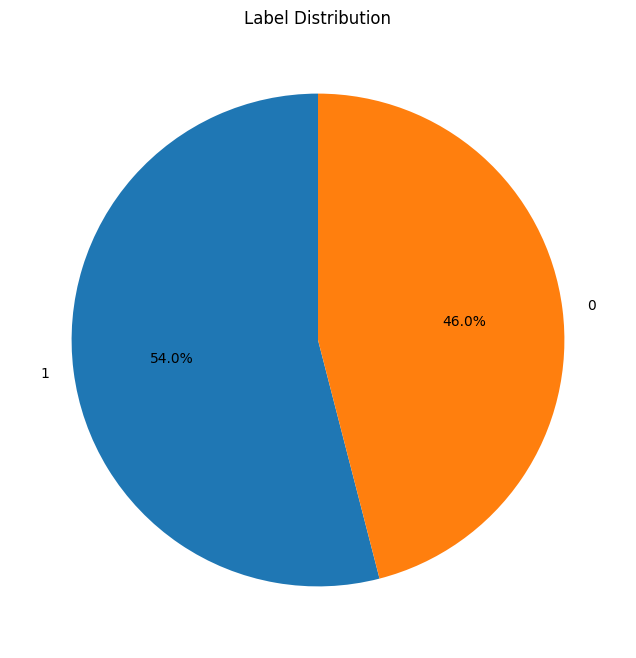

In [48]:
# plot label distribution as a pie chart
plt.figure(figsize=(8, 8))
df['label'].value_counts().plot.pie(autopct='%1.1f%%',
                                    startangle=90)
plt.title('Label Distribution')
plt.ylabel('')
plt.show()

## Violin Plot of Word Count by Label
* This violin plot shows the distribution of word counts for both labels (0 and 1) in the dataset. Both classes exhibit a similar range, with a high concentration of articles having relatively lower word counts. Label 0 (likely representing fake news) and label 1 (likely real news) both show a narrow peak at low word counts, with fewer instances having exceptionally high word counts. This indicates that most articles are short to moderately long, while a small number of articles are significantly lengthier across both categories.

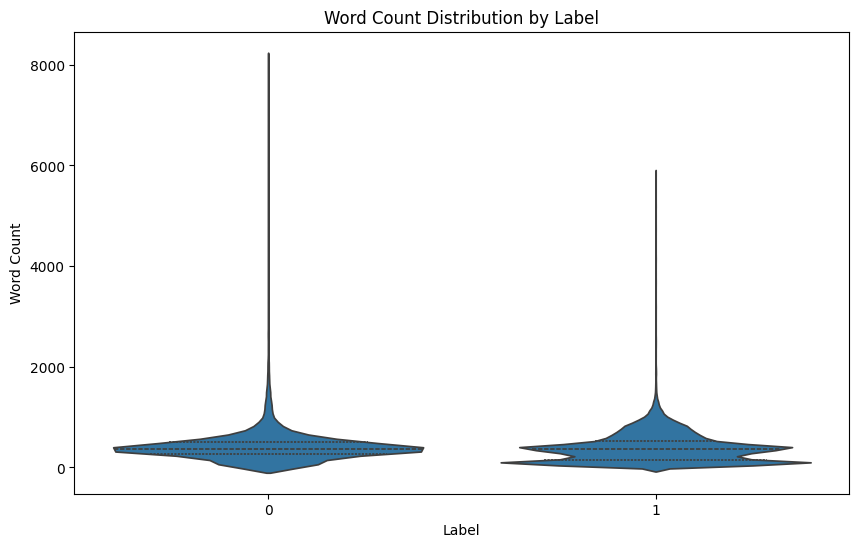

In [49]:
# calculate word count for each text entry
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# plot word count by label as a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df,
               x='label',
               y='word_count',
               inner='quartile',
               density_norm='width')
plt.title('Word Count Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.show()

## Histogram of Sentence Count by Label
* This plot shows the distribution of sentence counts in articles for labels 0 and 1. Both distributions are heavily skewed towards fewer sentences, indicating that the majority of articles are concise. Articles with label 1 (likely real news) have a slightly higher concentration at very low sentence counts than those with label 0, but both categories share a similar drop-off pattern as sentence count increases. The frequency of articles diminishes rapidly beyond approximately 50 sentences for both labels, with very few articles exceeding 100 sentences.

In [50]:
import nltk

In [51]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [52]:
from nltk.tokenize import sent_tokenize

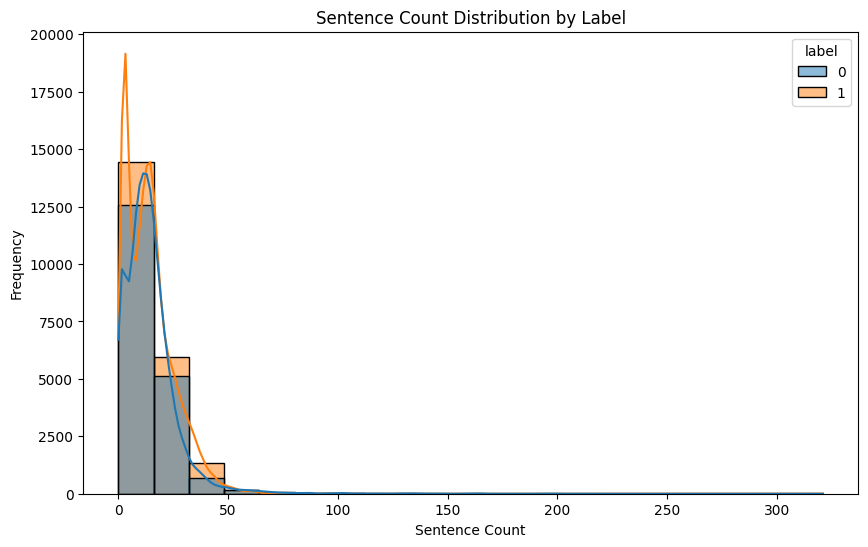

In [53]:
# calculate sentence count for each text entry
df['sentence_count'] = df['text'].apply(lambda x: len(sent_tokenize(str(x))))

# plot sentence count distribution by label
plt.figure(figsize=(10, 6))
sns.histplot(data=df,
             x='sentence_count',
             hue='label',
             bins=20,
             kde=True)
plt.title('Sentence Count Distribution by Label')
plt.xlabel('Sentence Count')
plt.ylabel('Frequency')
plt.show()

## Box Plot of Sentiment Polarity by Label
* This box plot displays the distribution of sentiment polarity scores for articles with labels 0 and 1. Both labels have sentiment polarity scores that are mostly centered around 0, indicating a neutral sentiment on average. There is a similar spread of positive and negative polarity scores in both groups, with numerous outliers on either end of the spectrum, extending up to ±1. This suggests that articles in both categories contain a range of sentiment levels, from highly negative to highly positive, though they predominantly hover near neutral.

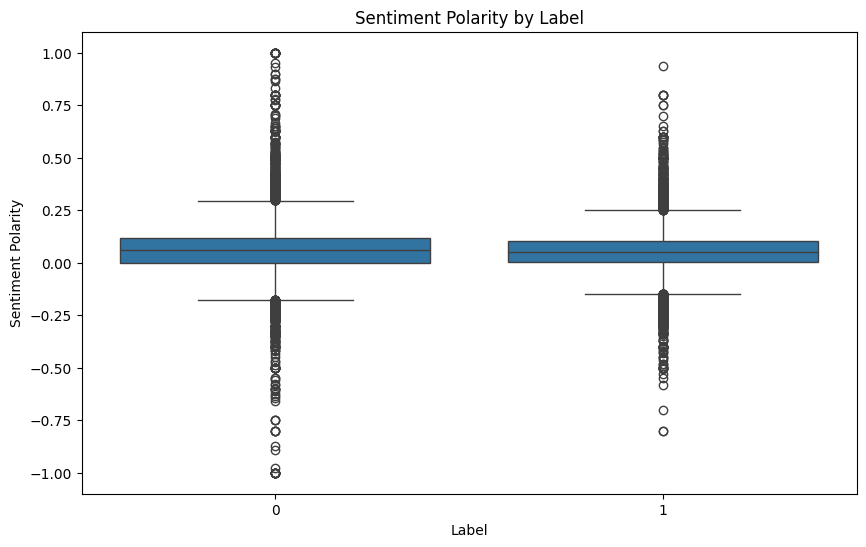

In [54]:
# calculate sentiment polarity for each text entry
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# plot sentiment polarity by label
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,
            x='label',
            y='sentiment')
plt.title('Sentiment Polarity by Label')
plt.xlabel('Label')
plt.ylabel('Sentiment Polarity')
plt.show()

## Term Frequency-Inverse Document Frequency (TF-IDF) Heatmap
* This heatmap displays the average TF-IDF scores of select words for labels 0 and 1, highlighting words with higher importance in each label. For label 1, words like “said” (0.41), “reuters” (0.21), and “trump” (0.20) have notably higher TF-IDF scores, indicating their prominence in true articles. In contrast, label 0 emphasizes words such as “trump” (0.34), “people” (0.16), and “just” (0.14), which are more commonly associated with false articles. This differentiation in word importance reflects distinct thematic elements or linguistic patterns between true and false news articles.

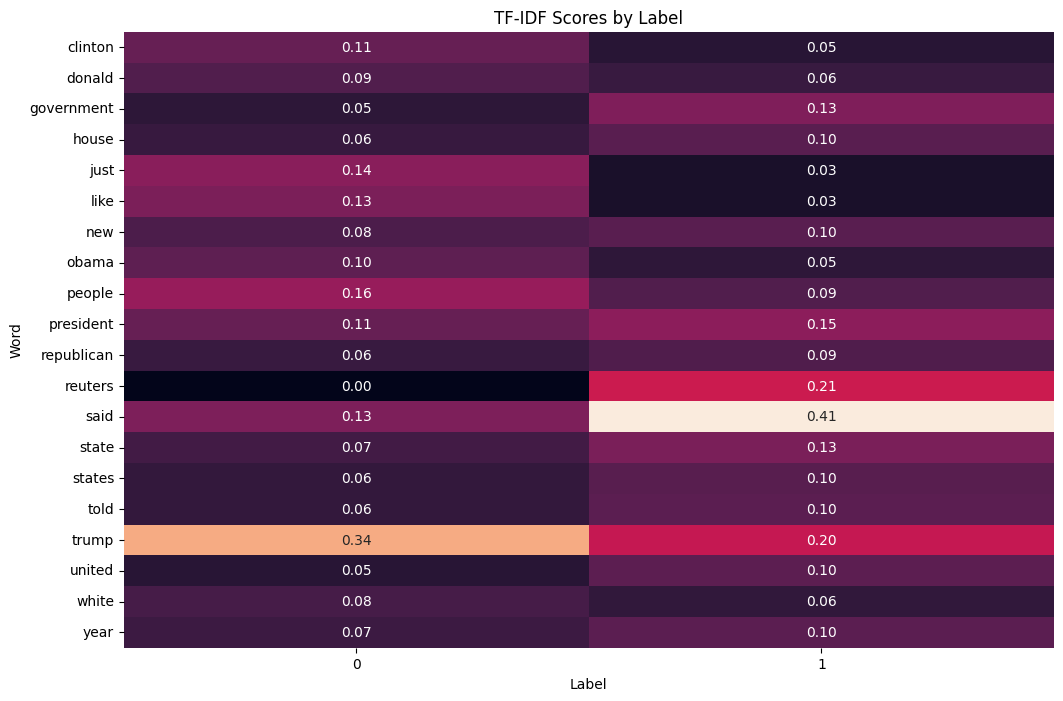

In [55]:
# create TF-IDF matrix
tfidf = TfidfVectorizer(stop_words='english', max_features=20)
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df['label'] = df['label']

# calculate mean TF-IDF score for each word by label
tfidf_mean = tfidf_df.groupby('label').mean().T

# plot heatmap of TF-IDF scores
plt.figure(figsize=(12, 8))
sns.heatmap(data=tfidf_mean,
            annot=True,
            cbar=False,
            fmt='.2f')
plt.title('TF-IDF Scores by Label')
plt.xlabel('Label')
plt.ylabel('Word')
plt.show()

## Radar Chart of Text Features by Label
* This radar chart compares three text features—average word length, sentence count, and sentiment—across labels 0 and 1. The chart shows that both labels have similar patterns in these text characteristics, with low sentiment polarity and moderate values for average word length. However, label 1 (orange line) has a slightly higher sentence count compared to label 0 (blue line), suggesting that true articles may contain more sentences on average than false ones. The similarity in other features indicates limited variation in word length and sentiment between true and false articles.

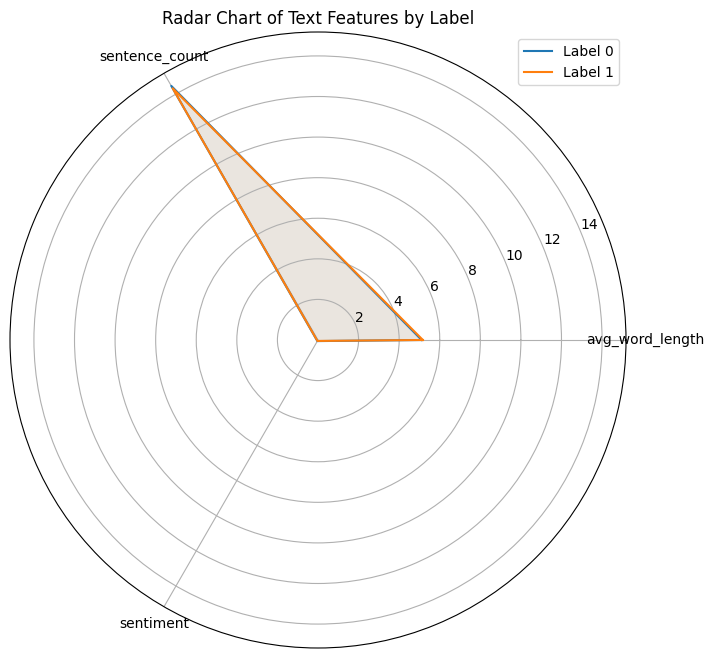

In [56]:
# calculate text metrics with handling for empty or missing values
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]) if x and len(str(x).split()) > 0 else 0)
df['sentence_count'] = df['text'].apply(lambda x: len(TextBlob(str(x)).sentences) if x else 0)
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity if x else 0)

# aggregate metrics by label, filling in any NaN values with 0
radar_data = df.groupby('label')[['avg_word_length',
                                  'sentence_count',
                                  'sentiment']].mean().fillna(0)

# create radar chart
categories = list(radar_data.columns)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# iterate through radar_data to plot each label
for i, row in radar_data.iterrows():
    values = row.values.flatten().tolist()
    values += values[:1]  # close the loop
    angles = [n / float(len(categories)) * 2 * np.pi for n in range(len(categories))]
    angles += angles[:1]

    # plot each label's values
    ax.plot(angles, values, label=f'Label {i}')
    ax.fill(angles, values, alpha=0.1)

# set category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# add title and legend
plt.title('Radar Chart of Text Features by Label')
plt.legend(loc='upper right')
plt.show()

## PCA or t-SNE Plot for Text Embeddings
* This PCA plot of text embeddings displays two principal components, separating data points by label (0 and 1). Although the points largely overlap, there is a noticeable pattern where label 0 (blue) and label 1 (green) tend to occupy different regions within the plot, with label 0 clustering more on the lower right and label 1 on the upper left. This separation indicates some distinguishable variance in text embeddings between the two labels, suggesting that the model can leverage these differences for classification, albeit with some overlap.

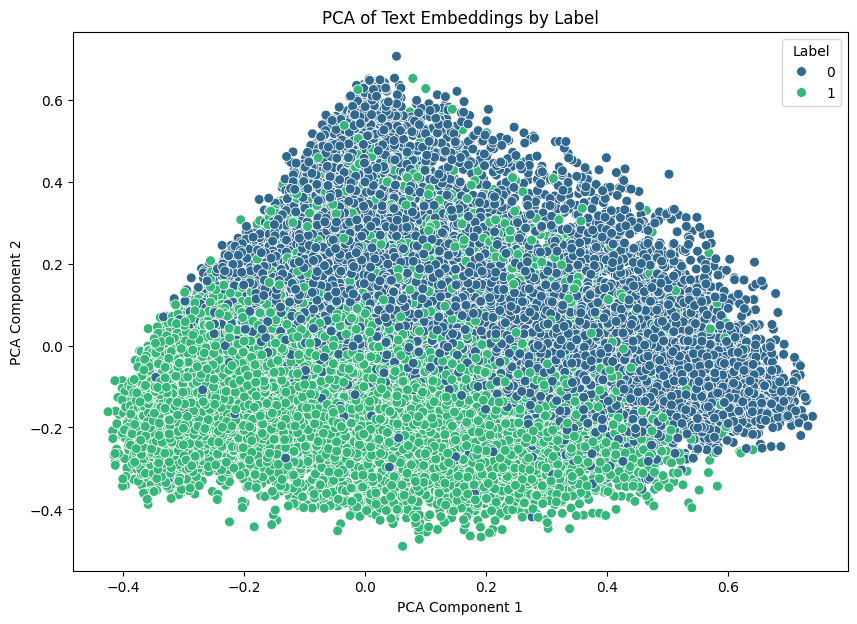

In [57]:
# create TF-IDF embeddings
tfidf = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = tfidf.fit_transform(df['text'].fillna(''))

# apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# create scatter plot of PCA results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['label'], palette="viridis", s=50)
plt.title('PCA of Text Embeddings by Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Label')
plt.show()

## Heatmap of Average Sentiment and Word Count by Label
* This heatmap shows the average word count and sentiment polarity for each label (0 and 1). Articles labeled 0 have a higher average word count of 428.78 compared to 390.14 for label 1. The sentiment scores, however, are very similar for both labels, with an average of 0.06 for label 0 and 0.05 for label 1, indicating that sentiment does not vary significantly between true and false articles. This suggests that word count might be a more distinguishing feature between the labels than sentiment.

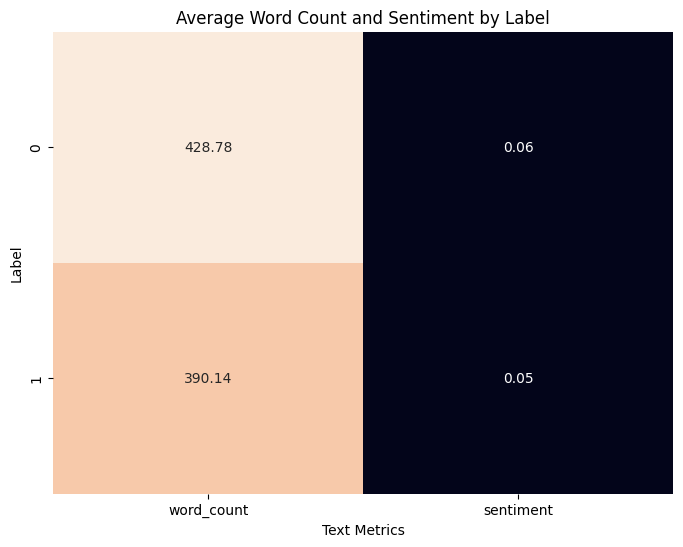

In [58]:
# calculate word count and sentiment polarity if not already calculated
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# aggregate mean values for word count and sentiment by label
heatmap_data = df.groupby('label')[['word_count', 'sentiment']].mean()

# plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data=heatmap_data,
            annot=True,
            cbar=False,
            fmt='.2f')
plt.title('Average Word Count and Sentiment by Label')
plt.xlabel('Text Metrics')
plt.ylabel('Label')
plt.show()

## Length vs. Sentiment Scatter Plot by Label
* This scatter plot illustrates the relationship between word count and sentiment polarity for labels 0 and 1. Sentiment polarity mostly clusters around zero, with some variation up to positive and negative extremes. As word count increases, sentiment polarity becomes more centered around zero, showing a reduced spread. There is no strong distinction between labels 0 and 1 based on this plot, as both labels exhibit similar distributions across word counts and sentiment values. This suggests that word count and sentiment polarity might not be highly effective distinguishing features between true and false articles in this dataset.

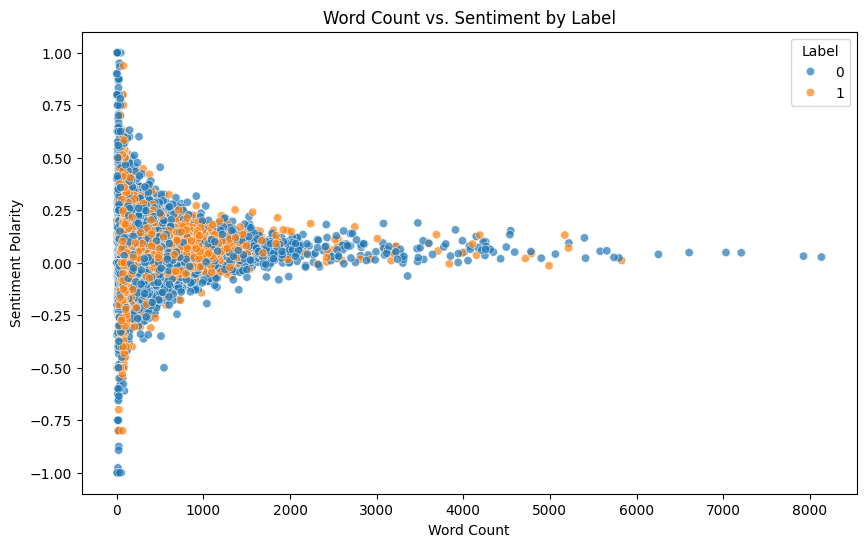

In [59]:
# scatter plot of word count vs. sentiment by label
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
                x='word_count',
                y='sentiment',
                hue='label',
                alpha=0.7)
plt.title('Word Count vs. Sentiment by Label')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Polarity')
plt.legend(title='Label')
plt.show()

## Density Plot of Sentence Length Distribution by Label
* This density plot displays the distribution of average sentence lengths for labels 0 and 1. Both labels show a similarly sharp peak near shorter average sentence lengths, with densities rapidly decreasing as sentence length increases. The majority of data points for both labels are clustered around lower average sentence lengths, indicating that most articles have relatively short sentences regardless of their label. There is minimal variation between labels in terms of average sentence length, suggesting that sentence length alone may not be a distinguishing feature between true and false articles in this dataset.

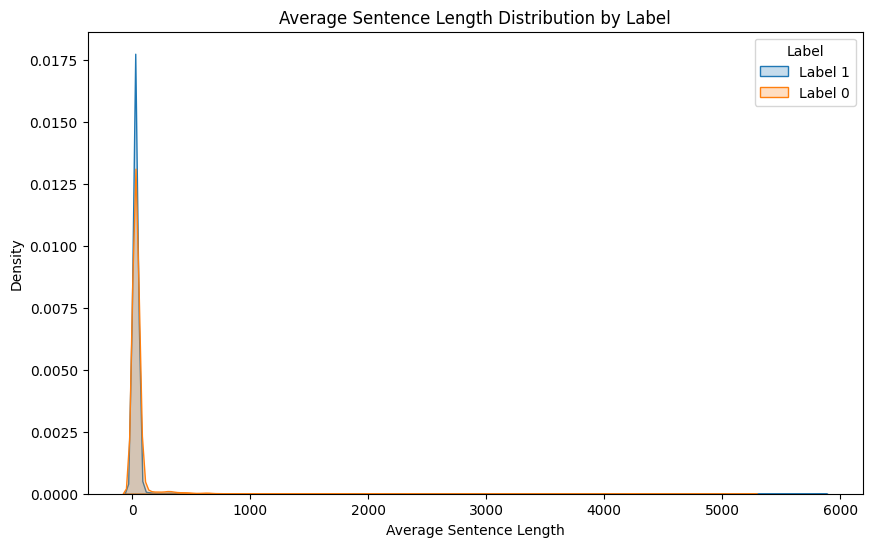

In [60]:
# calculate average sentence length with handling for empty or missing text entries
df['avg_sentence_length'] = df['text'].apply(lambda x: np.mean([len(sentence.split()) for sentence in TextBlob(str(x)).sentences]) if x and len(TextBlob(str(x)).sentences) > 0 else 0)

# density plot of average sentence length by label
plt.figure(figsize=(10, 6))
for label in df['label'].unique():
    subset = df[df['label'] == label]
    sns.kdeplot(subset['avg_sentence_length'], label=f'Label {label}', fill=True)
plt.title('Average Sentence Length Distribution by Label')
plt.xlabel('Average Sentence Length')
plt.ylabel('Density')
plt.legend(title='Label')
plt.show()

## Donut Chart of Label Distribution
* This donut chart illustrates the label distribution within the dataset. Label 1 (true articles) makes up 54% of the dataset, while label 0 (false articles) accounts for the remaining 46%. This close to even distribution suggests a balanced dataset, with a slight majority of articles labeled as true. This balance supports model training by providing relatively equal representation of both classes, reducing the risk of class imbalance bias.

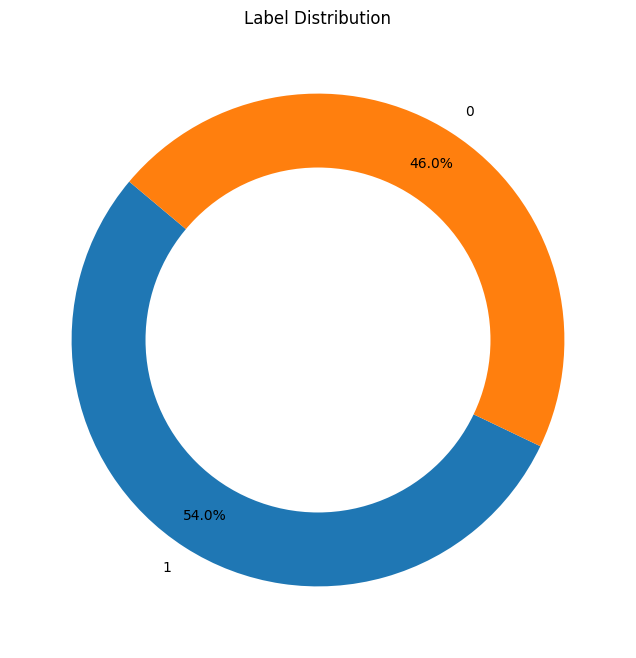

In [61]:
# calculate label distribution
label_counts = df['label'].value_counts()

# plot donut chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts,  # pass label_counts as the first argument
        labels=label_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.85)

# add center circle to create the donut effect
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# set title and display plot
plt.title('Label Distribution')
plt.show()

## Correlation Matrix of Text Features
* This correlation matrix shows the relationships between various text features: word count, average word length, sentence count, and sentiment. The strongest positive correlation is between word count and sentence count (0.77), indicating that texts with more words tend to have more sentences. Other correlations are relatively low, with minor negative correlations between average word length and both word count (-0.051) and sentence count (-0.053). Sentiment has minimal correlation with the other features, suggesting it operates independently of text length or structure within this dataset.

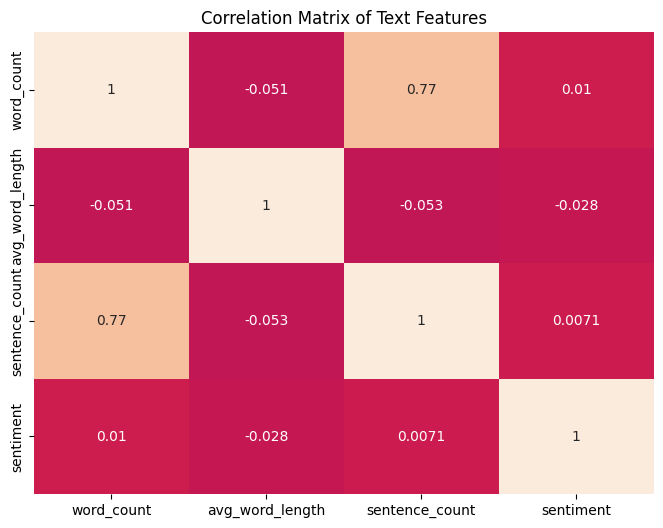

In [62]:
# calculate correlation matrix of text features
correlation_data = df[['word_count',
                       'avg_word_length',
                       'sentence_count',
                       'sentiment']].corr()

# plot correlation matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_data,
            annot=True,
            cbar=False,
            vmin=-1,
            vmax=1)
plt.title('Correlation Matrix of Text Features')
plt.show()

## Neural Network
* This model evaluation summary details the results of a 5-fold cross-validation training process for a binary classifier, designed to predict whether an article is true or fake news. Each fold consisted of 5 epochs, with the loss generally decreasing to nearly zero, indicating effective learning. Accuracy and AUC (Area Under the Curve) scores were consistently high across folds, with fold accuracies ranging from 0.9692 to 0.9757 and AUCs between 0.9949 and 0.9967. The average accuracy across all folds was 0.9733, and the average AUC was 0.9956, demonstrating robust model performance. The best model achieved an accuracy of 0.9733 and an AUC of 0.9967. The model architecture consists of three linear layers with ReLU activations and a final Sigmoid layer, forming a straightforward feedforward neural network for binary classification. In an inference test, the model predicted that a new article with the title “Palestinians switch off Christmas lights in Bethlehem in anti-Trump protest” and text “RAMALLAH, West Bank (Reuters) - Palestinians switched off Christmas lights at Jesus’ traditional birthplace” is likely to be true, demonstrating its capability to make predictions on unseen data.

In [63]:
!pip install torch

   ---------------------------------------- 0.0/203.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/203.1 MB 3.5 MB/s eta 0:00:59
   ---------------------------------------- 0.3/203.1 MB 3.5 MB/s eta 0:00:59
   ---------------------------------------- 0.6/203.1 MB 5.0 MB/s eta 0:00:41
   ---------------------------------------- 1.1/203.1 MB 5.8 MB/s eta 0:00:35
   ---------------------------------------- 1.4/203.1 MB 6.0 MB/s eta 0:00:34
   ---------------------------------------- 1.8/203.1 MB 6.3 MB/s eta 0:00:32
   ---------------------------------------- 2.0/203.1 MB 6.2 MB/s eta 0:00:33
   ---------------------------------------- 2.4/203.1 MB 6.6 MB/s eta 0:00:31
    --------------------------------------- 2.7/203.1 MB 6.5 MB/s eta 0:00:31
    --------------------------------------- 3.0/203.1 MB 6.6 MB/s eta 0:00:31
    --------------------------------------- 3.3/203.1 MB 6.7 MB/s eta 0:00:30
    --------------------------------------- 3.7/203.1 MB 6.8 MB/s eta 0


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_extraction.text import TfidfVectorizer

### Step 1: Device Selection (CPU, CUDA, or MPS)

In [65]:
# device selection: MPS (for macOS with Apple Silicon), CUDA, or CPU
device = 'mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using Device: {device}')

Using Device: cpu


### Step 2: Define the Neural Network Model

In [66]:
class FakeNewsBinaryClassifier(nn.Module):
    """
    A binary classification neural network model for fake news detection.
    This model is designed for binary classification tasks, predicting whether
    an article is true or false based on its title and text content. It consists
    of three fully connected layers with ReLU activations and a final Sigmoid activation
    to output probabilities between 0 and 1.
    """

    def __init__(self, input_dim):
        """
        Initializes the FakeNewsBinaryClassifier model with the specified input dimensions.

        Params:
            input_dim: int
        """
        super(FakeNewsBinaryClassifier, self).__init__()
        self.network = nn.Sequential(nn.Linear(input_dim, 128),
                                     nn.ReLU(),
                                     nn.Linear(128, 64),
                                     nn.ReLU(),
                                     nn.Linear(64, 1),
                                     nn.Sigmoid())

    def forward(self, x):
        """
        Defines the forward pass of the model.

        Params:
            x: torch.Tensor

        Returns:
            torch.Tensor
        """
        return self.network(x)

### Step 3: Update the Code to Use the Selected Device

In [67]:
# combine title and text columns, then vectorize them
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['title'] + " " + df['text']).toarray()
y = df['label'].values  # labels for training

# convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# move tensors to the selected device
X_tensor = X_tensor.to(device)
y_tensor = y_tensor.to(device)

# parameters
num_epochs = 5
kf = KFold(n_splits=5, shuffle=True, random_state=101)
fold_results = []
best_accuracy = 0
best_auc = 0  # initialize best AUC score
best_model_state = None  # initialize to store the best model state

# 5-Fold Cross-Validation
for fold, (train_idx, val_idx) in enumerate(kf.split(X_tensor)):
    print(f"Fold {fold+1}")

    # split data for this fold
    X_train, X_val = X_tensor[train_idx], X_tensor[val_idx]
    y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

    # DataLoader for the current fold
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

    # initialize model, loss function, and optimizer for each fold
    model = FakeNewsBinaryClassifier(input_dim=1000).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # training loop for each fold
    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # move inputs and labels to device
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

    # evaluate on the validation set
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_preds = (val_outputs >= 0.5).float()

        # calculate metrics for the current fold
        accuracy = accuracy_score(y_val.cpu(), val_preds.cpu())
        auc = roc_auc_score(y_val.cpu(), val_outputs.cpu())
        print(f'Fold {fold+1} Accuracy: {accuracy:.4f}, AUC: {auc:.4f}')

        # store results for this fold
        fold_results.append((accuracy, auc))

        # save the model if it's the best based on AUC
        if auc > best_auc:
            best_accuracy = accuracy
            best_auc = auc
            best_model_state = model.state_dict()  # save the best model's state_dict

Fold 1
Epoch 1/5, Loss: 0.0326
Epoch 2/5, Loss: 0.0001
Epoch 3/5, Loss: 0.0000
Epoch 4/5, Loss: 0.0007
Epoch 5/5, Loss: 0.0001
Fold 1 Accuracy: 0.9739, AUC: 0.9959
Fold 2
Epoch 1/5, Loss: 0.0006
Epoch 2/5, Loss: 0.0011
Epoch 3/5, Loss: 0.0004
Epoch 4/5, Loss: 0.0000
Epoch 5/5, Loss: 0.0143
Fold 2 Accuracy: 0.9752, AUC: 0.9951
Fold 3
Epoch 1/5, Loss: 0.0065
Epoch 2/5, Loss: 0.0323
Epoch 3/5, Loss: 0.0085
Epoch 4/5, Loss: 0.0295
Epoch 5/5, Loss: 0.0000
Fold 3 Accuracy: 0.9723, AUC: 0.9952
Fold 4
Epoch 1/5, Loss: 0.0020
Epoch 2/5, Loss: 0.0189
Epoch 3/5, Loss: 0.0000
Epoch 4/5, Loss: 0.0013
Epoch 5/5, Loss: 0.0000
Fold 4 Accuracy: 0.9718, AUC: 0.9958
Fold 5
Epoch 1/5, Loss: 0.0076
Epoch 2/5, Loss: 0.0002
Epoch 3/5, Loss: 0.0004
Epoch 4/5, Loss: 0.0000
Epoch 5/5, Loss: 0.0000
Fold 5 Accuracy: 0.9756, AUC: 0.9963


### Step 4: Report Cross-Validation Results

In [68]:
# calculate average metrics across all folds
average_accuracy = np.mean([result[0] for result in fold_results])
average_auc = np.mean([result[1] for result in fold_results])

# provide results
print(f'5-Fold Cross-Validation Results')
print(f'Average Accuracy: {average_accuracy:.4f}')
print(f'Average AUC: {average_auc:.4f}')

5-Fold Cross-Validation Results
Average Accuracy: 0.9738
Average AUC: 0.9957


### Step 5: Save and Load the Model

In [69]:
# after cross-validation, save the best model
if best_model_state is not None:
    torch.save(best_model_state, 'fake_news_classifier_new.pth')
    print(f'Best Model w/ Accuracy: {best_accuracy:.4f}, AUC: {best_auc:.4f}')

# load the model for inference
loaded_model = FakeNewsBinaryClassifier(input_dim=1000).to(device)
loaded_model.load_state_dict(torch.load('fake_news_classifier_new.pth', weights_only=True))
loaded_model.eval()

Best Model w/ Accuracy: 0.9756, AUC: 0.9963


FakeNewsBinaryClassifier(
  (network): Sequential(
    (0): Linear(in_features=1000, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

### Step 6: Inference on New, Unlabeled Data

In [70]:
def predict(model, X):
    """
    Generates a binary prediction ('True' or 'False') for the input data using the specified model.

    Params:
        model: torch.nn.Module
        X: torch.Tensor

    Returns:
        str
    """
    with torch.no_grad():
        output = model(X)
        prediction = (output >= 0.5).float()
    return 'True' if prediction.item() == 1 else 'False'

In [71]:
# new article for inference (no label)
sample_title = 'Palestinians switch off Christmas lights in Bethlehem in anti-Trump protest.'
sample_text = 'RAMALLAH, West Bank (Reuters) - Palestinians switched off Christmas lights at Jesus traditional birthplace.'

# combine and vectorize, then move to device
sample_combined = sample_title + ' ' + sample_text
sample_vector = vectorizer.transform([sample_combined]).toarray()
sample_tensor = torch.tensor(sample_vector, dtype=torch.float32).to(device)

# run inference
print("Prediction:", predict(loaded_model, sample_tensor))

Prediction: True
